### 使用逻辑回归来评估页面分割好坏
#### The Data
我们建立一个回归模型，来评估我们页面切割方式是否够好

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path = 'data' + os.sep + 'result_20190905.xlsx'
pdData = pd.read_excel(path, sheet_name='Sheet1')
pdData.head()

,URL,NumberOfRooms,Completeness,CompletenessGain,Purity,Admitted
0,https://www.oyorooms.com/id/40374-oyo-rooms-oy...,1.0,3.0,0.0,0.500000,0
1,https://www.oyorooms.com/id/40374-oyo-rooms-oy...,2.0,4.0,0.0,0.333333,1
2,https://www.oyorooms.com/id/40374-oyo-rooms-oy...,2.0,5.0,0.0,0.166667,1
3,https://www.oyorooms.com/id/40374-oyo-rooms-oy...,0.0,6.0,0.0,0.666667,0
4,http://www.balibobo.com,2.0,3.0,0.0,0.500000,0


In [3]:
pdData.shape

(404, 6)

In [4]:
# 数据预处理
pdData = pdData.dropna(axis = 0,how='any')
pdData = pdData.drop(['URL', 'CompletenessGain', 'Purity'], axis=1)
pdData.head()

,NumberOfRooms,Completeness,Admitted
0,1.0,3.0,0
1,2.0,4.0,1
2,2.0,5.0,1
3,0.0,6.0,0
4,2.0,3.0,0


In [5]:
pdData.shape

(400, 3)

Text(0, 0.5, 'Completeness Score')

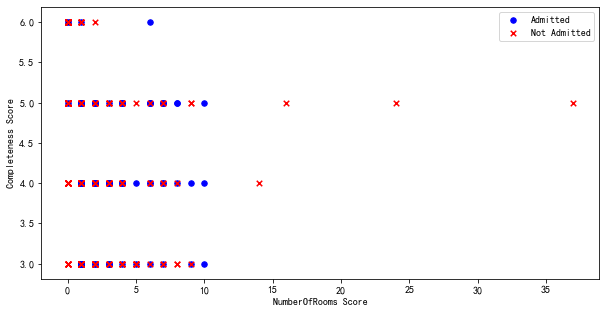

In [6]:
positive = pdData[pdData['Admitted'] == 1] # returns the subset of rows such Admitted = 1, i.e. the set of *positive* examples
negative = pdData[pdData['Admitted'] == 0] # returns the subset of rows such Admitted = 0, i.e. the set of *negative* examples

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(positive['NumberOfRooms'], positive['Completeness'], s=30, c='b', marker='o', label='Admitted')
ax.scatter(negative['NumberOfRooms'], negative['Completeness'], s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('NumberOfRooms Score')
ax.set_ylabel('Completeness Score')

#### 要完成模块
- Sigmoid: 映射到概率函数
- model: 返回预测结果值
- cost: 根据参数计算损失
- gradient：计算每个参数的梯度方向
- descent：进行参数更新
- accuracy: 计算精度

     

### sigmoid 函数

$$g(z) = \frac{ 1 }{ 1 + e^{-z} }$$

In [43]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

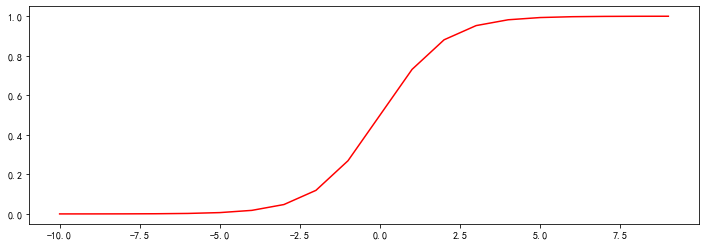

In [44]:
nums = np.arange(-10, 10, step=1) #creates a vector containing 20 equally spaced values from -10 to 10
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(nums, sigmoid(nums), 'r')